# Assignment 3

Problem Statement - Build a CNN to classify different breeds of snakes, and visualize the effect of CNN layers.


In [1]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2022-08-16 07:10:16--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.40.228
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.40.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M  97.9MB/s    in 1.0s    

2022-08-16 07:10:18 (97.9 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [ ]:
!unzip /content/8a95c26e1bab11eb.zip

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("/content/dataset/train.csv")

In [5]:
train.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [6]:
train.columns = ['filename','class']
train.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [7]:
train['filename'] = '/content/dataset/train/' + train['filename'] + '.jpg'

In [8]:
train.head()

,filename,class
0,/content/dataset/train/a8b3ad1dde.jpg,nerodia-erythrogaster
1,/content/dataset/train/8b492b973d.jpg,pantherophis-vulpinus
2,/content/dataset/train/929b99ea92.jpg,thamnophis-sirtalis
3,/content/dataset/train/bbac7385e2.jpg,pantherophis-obsoletus
4,/content/dataset/train/ef776b1488.jpg,agkistrodon-contortrix


In [9]:
#df = pd.DataFrame(train)

In [10]:
#df['class'] = df['class'].str.split("-").str[0]

In [11]:
#df.head()

In [12]:
#train['class'] = train['class'].str.split("-").str[0]

In [13]:
train['class'].value_counts()

thamnophis-sirtalis            509
storeria-dekayi                412
pantherophis-obsoletus         366
crotalus-atrox                 354
pituophis-catenifer            298
nerodia-sipedon                259
agkistrodon-contortrix         206
lampropeltis-triangulum        197
diadophis-punctatus            184
pantherophis-alleghaniensis    172
nerodia-erythrogaster          171
lampropeltis-californiae       166
opheodrys-aestivus             152
agkistrodon-piscivorus         147
crotalus-horridus              142
coluber-constrictor            129
heterodon-platirhinos          118
thamnophis-proximus            112
nerodia-rhombifer              104
thamnophis-radix               100
pantherophis-guttatus          100
haldea-striatula                98
pantherophis-spiloides          92
rhinocheilus-lecontei           91
storeria-occipitomaculata       87
masticophis-flagellum           83
crotalus-viridis                83
thamnophis-marcianus            82
crotalus-ruber      

In [14]:
unique_features = train['class'].unique()
len(unique_features)

35

In [15]:
sample = train.sample(16)
files = sample['filename'].tolist()
targets = sample['class'].tolist()

In [43]:
sample.head()

,filename,class
3707,/content/dataset/train/63780e6239.jpg,nerodia-sipedon
1418,/content/dataset/train/ac36e385b8.jpg,crotalus-ruber
4052,/content/dataset/train/901ad4d545.jpg,thamnophis-sirtalis
5193,/content/dataset/train/0b805b523f.jpg,pantherophis-obsoletus
906,/content/dataset/train/ba1fa15c2d.jpg,pantherophis-alleghaniensis


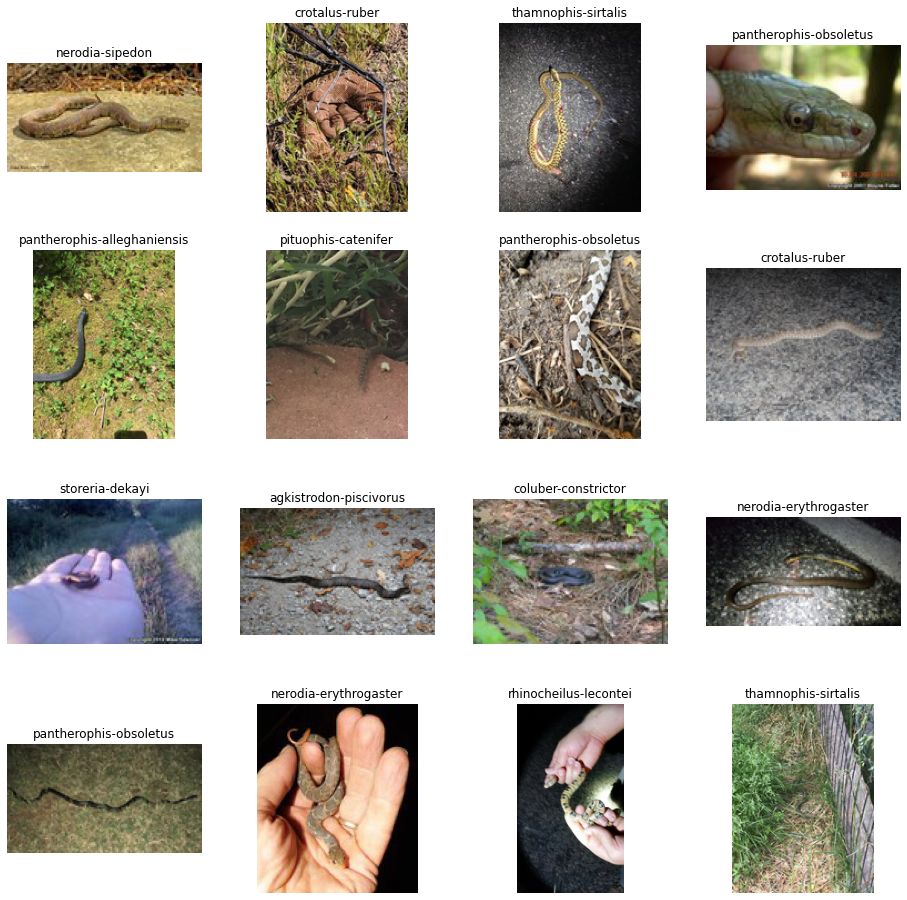

In [16]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

for i, (img_path,target) in enumerate(zip(files,targets)):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("off")
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(target)

plt.show()

In [17]:
temp_90 = train.sample(frac=0.9)
temp_10 = train.sample(frac=0.1)
x_train = temp_90.reset_index(drop = True)
x_val = temp_10.reset_index(drop=True)
x_train.shape, x_val.shape


((4957, 2), (551, 2))

In [18]:
x_train = train.sample(frac = 0.9)
x_val = train.drop(x_train.index)
x_train.shape, x_val.shape

((4957, 2), (551, 2))

In [19]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255,
      rotation_range=30,
#     width_shift_range=0.2, 
#     height_shift_range=0.2,
      shear_range=0.2,       
      zoom_range=0.3,       
      horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = x_train,
    directory = '/content/dataset/train',
    shuffle = True,
    target_size=(256,256),
    class_mode = 'categorical'
)

Found 4957 validated image filenames belonging to 35 classes.


In [20]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = x_val,
    directory = '/content/dataset/train',
    target_size=(256,256),
    shuffle =True,
    class_mode = 'categorical'
)

Found 551 validated image filenames belonging to 35 classes.


In [21]:
tf.keras.backend.clear_session()

In [22]:

model = tf.keras.Sequential()

#Input Layer
model.add(InputLayer(input_shape=(256,256,3)))

#Conv and Max2D layers
'''model.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))'''

model.add(Conv2D(filters = 32, kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu')) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters = 16, kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

#Hidden Layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))


model.add(Dropout(0.2))

#Output Layer
model.add(Dense(len(unique_features), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 512)               3

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs ={}):
        
        if(logs.get('accuracy')> 0.70): 
            self.model.stop_training = True
            
callback = CustomCallback()

In [25]:
history = model.fit(
      train_generator,
      epochs = 10,
      validation_data=val_generator,
      callbacks=[callback])

Epoch 1/10
155/155 [==============================] - 82s 449ms/step - loss: 3.4856 - accuracy: 0.0807 - val_loss: 3.4086 - val_accuracy: 0.0780
Epoch 2/10
155/155 [==============================] - 70s 454ms/step - loss: 3.3954 - accuracy: 0.0898 - val_loss: 3.3863 - val_accuracy: 0.0780
Epoch 3/10
155/155 [==============================] - 69s 448ms/step - loss: 3.3815 - accuracy: 0.0936 - val_loss: 3.3973 - val_accuracy: 0.0780
Epoch 4/10
155/155 [==============================] - 70s 454ms/step - loss: 3.3745 - accuracy: 0.0910 - val_loss: 3.4103 - val_accuracy: 0.0780
Epoch 5/10
155/155 [==============================] - 71s 458ms/step - loss: 3.3759 - accuracy: 0.0896 - val_loss: 3.4040 - val_accuracy: 0.0744
Epoch 6/10
155/155 [==============================] - 70s 453ms/step - loss: 3.3653 - accuracy: 0.1017 - val_loss: 3.4133 - val_accuracy: 0.0762
Epoch 7/10
155/155 [==============================] - 69s 445ms/step - loss: 3.3507 - accuracy: 0.1043 - val_loss: 3.3863 - val_ac

In [26]:
model.evaluate(val_generator)

18/18 [==============================] - 1s 59ms/step - loss: 3.3744 - accuracy: 0.0962


[3.3743815422058105, 0.0961887463927269]

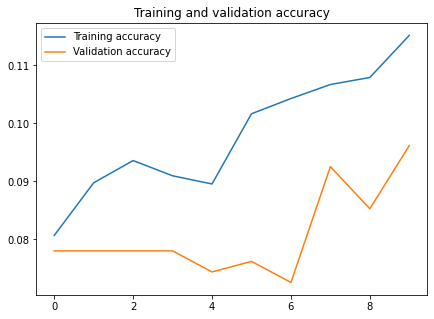

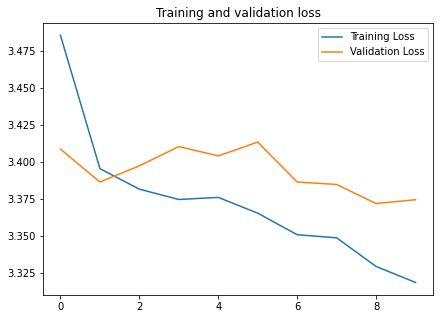

In [27]:
plt.figure(figsize=(7,5))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

prob = model.predict(val_generator)
pred = np.argmax(prob, axis=1)

In [29]:
print(confusion_matrix(val_generator.classes, pred))

[[ 0  0  0 ...  0  0 12]
 [ 0  0  0 ...  0  0  7]
 [ 0  0  0 ...  0  0  5]
 ...
 [ 0  0  0 ...  0  0 16]
 [ 0  0  0 ...  0  0  9]
 [ 0  0  0 ...  0  0 34]]


In [30]:
print("F-1 Score=", np.round(f1_score(val_generator.classes, pred, average='weighted'), 3))

F-1 Score= 0.026


## Visualizing the effect of CNN layers on a image

(256, 256, 3)
(1, 256, 256, 3)
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 16)
(1, 62, 62, 16)


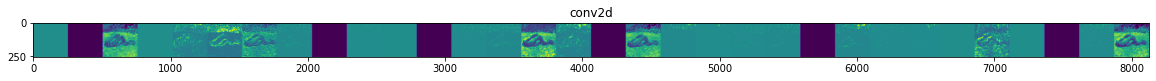

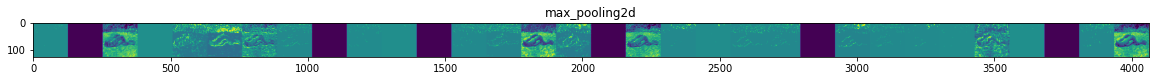

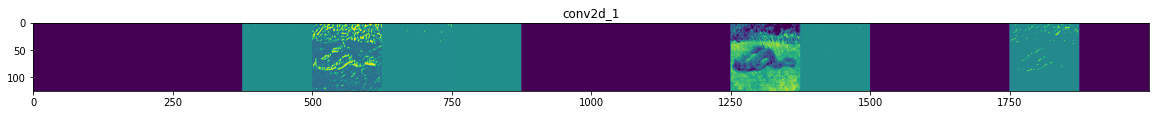

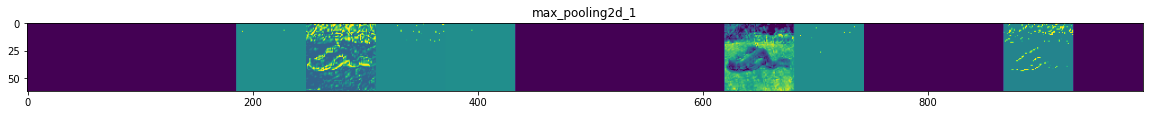

In [51]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[0], target_size=(256, 256) )
x=tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x=x.reshape ((1, ) + x.shape)
print (x.shape)
x/=255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len (feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    print(feature_map.shape)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x= feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype ('uint8')
      display_grid[:, i*size : (i + 1) * size] = x
    scale =20. /n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Visualizing Predictions

In [44]:
labels = dict((v,k) for k,v in train_generator.class_indices.items())

In [45]:
pred_labels = [] 
actuals = []
pred = np.argmax(model.predict(val_generator), axis=1)
for i in range(551):
    pred_labels.append(labels[pred[i]])
    actuals.append(labels[val_generator.classes[i]])

In [46]:
test_df = pd.DataFrame(columns=['file', 'pred_labels', 'actuals'])
test_df['file'] = val_generator.filenames
test_df['pred_labels'] = pred_labels
test_df['actuals'] = actuals
test_df.head()

,file,pred_labels,actuals
0,/content/dataset/train/929b99ea92.jpg,pantherophis-obsoletus,thamnophis-sirtalis
1,/content/dataset/train/4fd6a5e5fa.jpg,thamnophis-sirtalis,crotalus-horridus
2,/content/dataset/train/b4b1201f20.jpg,crotalus-atrox,thamnophis-marcianus
3,/content/dataset/train/289dc74860.jpg,thamnophis-sirtalis,storeria-dekayi
4,/content/dataset/train/461d5c01b8.jpg,thamnophis-sirtalis,thamnophis-sirtalis


In [47]:
sample = pd.DataFrame(test_df.sample(10))

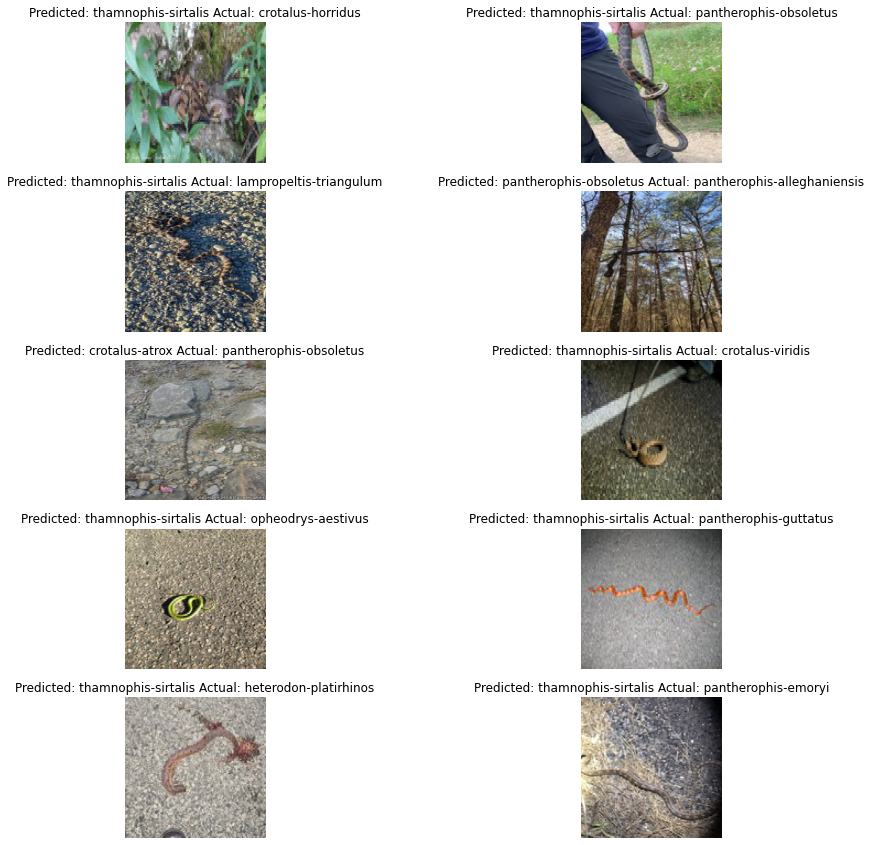

In [50]:
j=1
plt.figure(figsize=(15,15))
for i in sample.index:

  plt.subplot(5, 2, j)
  img = tf.keras.preprocessing.image.load_img(sample['file'][i], target_size = (256, 256))
  plt.imshow(img)
  plt.axis("off")
  plt.title("Predicted: " + test_df['pred_labels'][i] + " Actual: " + test_df['actuals'][i])
  j+=1